In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler



if torch.cuda.is_available():
    device = torch.device("cuda")
    use_cuda = True
else:
    device = torch.device("cpu")
    use_cuda = False
    
print(device)

print(f"Your version of Pytorch is {torch.__version__}. You should use a version >0.4.")



from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/IFT6135/Devoir 3/assignment3/')



cuda
Your version of Pytorch is 1.0.1.post2. You should use a version >0.4.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
sys.path.insert(0, '/content/gdrive/My Drive/Colab Notebooks/IFT6135/Devoir 3/assignment3/')
import samplers

r -1.0 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.9 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.8 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.7000000000000001 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.6000000000000001 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.5000000000000001 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.40000000000000013 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.30000000000000016 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.20000000000000018 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -0.1000000000000002 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r -2.220446049250313e-16 tensor(6.4009e-05, device='cuda:0', grad_fn=<NegBackward>)
r 0.09999999999999964 tensor(0.6929, device='cuda:0', grad_fn=<NegBackward>)
r 0.19999999999999973 tensor(0.6931, device='cuda:0', grad_fn=<NegBackward>)
r 0.2999999999999998 tensor(0.6931

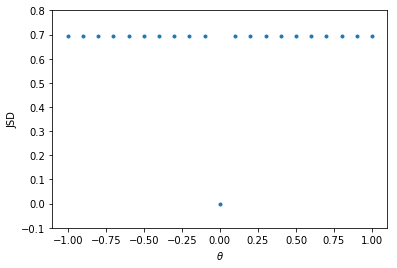

In [3]:
import os
import matplotlib.pyplot as plt
import itertools
import pickle
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import samplers


# Voici l'architecture utilisé pour le discrimineur
class JSD(nn.Module):
  def __init__(self, d=[1000,1000],dmz=2):
    super(JSD, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(dmz, d[0]),
        nn.ReLU(),
        nn.Linear(d[0], d[1]),
        nn.ReLU(),
        nn.Linear(d[1], 1),
        nn.Sigmoid()
    )
      
  def forward(self, x):
    x = self.layers(x)
    return x
  
  
def JS_loss(p,q):
  # Pour calculer la loss associé à la maximisation de l'objectif de JSD on envoit les distributions à la fonction ou le sampling est fait et on calcule la valeur de l'objectif.
  # Comme pytorch minimise la loss on prend mois la valeur de l'objectif.
  x=model(Variable(torch.from_numpy(next(p))).float().to(device))
  y=model(Variable(torch.from_numpy(next(q))).float().to(device))
  obj=np.log(2)+0.5*(torch.log(x)+torch.log(1-y))
  return -obj






def trainJSD(model, epochs, p, q):
  for epoch in range(epochs):
      model.train()

      train_losses = []
      for i in range(1):

          optimizer.zero_grad()

          loss=JS_loss(p,q).mean()
          loss.backward()
          optimizer.step()

          train_losses.append(loss.item())
  return loss


r=[]
for x in np.arange(-1,1.1,0.1):
  # on veut calculer la JSD pour l'intervalle x=[-1,1] avec de bons de 0.1.
  dmz=2
  model=JSD()
  model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  epochs = 50
  p=samplers.distribution1(0,512)
  q=samplers.distribution1(x,512)
  
  
  # On veut tracer l'objectif, on prend donc moins la loss (puisque la loss est moins l'objectif).
  r.append(-trainJSD(model, epochs, p, q))
  
  print("r",x,r[-1])

plt.xlim(-1.1,1.1)
plt.ylim(-0.1,0.8)
plt.xlabel(r"$\theta$")
plt.ylabel("JSD")
plt.plot(np.arange(-1,1.1,0.1),r,'.')

            



r -1.0 tensor(13905957., device='cuda:0', grad_fn=<SubBackward0>)
r -0.9 tensor(12517667., device='cuda:0', grad_fn=<SubBackward0>)
r -0.8 tensor(11557938., device='cuda:0', grad_fn=<SubBackward0>)
r -0.7000000000000001 tensor(9746109., device='cuda:0', grad_fn=<SubBackward0>)
r -0.6000000000000001 tensor(8070547.5000, device='cuda:0', grad_fn=<SubBackward0>)
r -0.5000000000000001 tensor(7083084., device='cuda:0', grad_fn=<SubBackward0>)
r -0.40000000000000013 tensor(5523532., device='cuda:0', grad_fn=<SubBackward0>)
r -0.30000000000000016 tensor(4113188., device='cuda:0', grad_fn=<SubBackward0>)
r -0.20000000000000018 tensor(2772479.5000, device='cuda:0', grad_fn=<SubBackward0>)
r -0.1000000000000002 tensor(1318693.7500, device='cuda:0', grad_fn=<SubBackward0>)
r -2.220446049250313e-16 tensor(0.0912, device='cuda:0', grad_fn=<SubBackward0>)
r 0.09999999999999964 tensor(1375932., device='cuda:0', grad_fn=<SubBackward0>)
r 0.19999999999999973 tensor(2719340.2500, device='cuda:0', grad_f

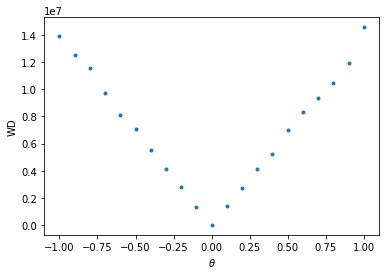

In [4]:
import os
import matplotlib.pyplot as plt
import itertools
import pickle
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import samplers


def Wd(model, p, q):
  # On calcule la WD à partir des distribution et du model.
    x = torch.FloatTensor(next(p)).to(device)
    y = torch.FloatTensor(next(q)).to(device)
    return torch.mean(model(x)) - torch.mean(model(y))

def Gradz(model,batch_size, p, q):
  # Afin de se limiter au fonction 1-lipschitz on à besoin du gradient par rapport à z. Pour se faire on ressample sur à partir des distributions x et y, et pour la 
  # la distribution de alpha. On s'assure de ne pas propager le gradient en remettant l'optimiseur à zero_grad.
  alpha = torch.FloatTensor(next(samplers.distribution2(batch_size))[:,[0]]).to(device)
  
  z = alpha*(torch.FloatTensor(next(p)).to(device)) + (1 - alpha)*torch.FloatTensor(next(q)).to(device)
  z.requires_grad=True
  z.retain_grad()

  out=model(z)
  torch.sum(out).backward()
  
  norm=(torch.sqrt(torch.sum(z.grad**2, dim=1))-1)**2
  optimizer.zero_grad()
  return norm



def WD_loss(x,y,grad):
  # On calcule la WD_loss, encore une fois cela correspond à moins l'objectif
  l=10
  obj= torch.mean(x) - torch.mean(y)- l * torch.mean(grad)
  
  return -obj


class WD(nn.Module):
  def __init__(self, d=[1000,1000],dmz=2):
    super(WD, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(dmz, d[0]),
        nn.ReLU(),
        nn.Linear(d[0], d[1]),
        nn.ReLU(),
        nn.Linear(d[1], 1)
    )
      
  def forward(self, x):
    x = self.layers(x)
    return x



def trainWD(model,batch_size, epochs, p, q):
  for epoch in range(epochs):
      model.train()

      optimizer.zero_grad()

      tx=model(torch.FloatTensor(next(p)).to(device))
      ty=model(torch.FloatTensor(next(q)).to(device))
      
      gradz=Gradz(model,batch_size,p,q)
      
      loss=WD_loss(tx,ty,gradz)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()     
          
  return  Wd(model, p, q)

r=[]
for x in np.arange(-1,1.1,0.1):
  dmz=2
  model=WD()
  model.to(device)
  optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

  batch_size=1024
  epochs = 200
  p=samplers.distribution1(0,batch_size)
  q=samplers.distribution1(x,batch_size)
  

  r.append(trainWD(model,batch_size, epochs, p, q))
  
  print("r",x,r[-1])

plt.xlim(-1.1,1.1)
plt.xlabel(r'$\theta$')
plt.ylabel("WD")
plt.plot(np.arange(-1,1.1,0.1),r,".")


torch.Size([1000, 1])
(1000, 1)


Text(0.5, 1.0, 'Estimated vs True')

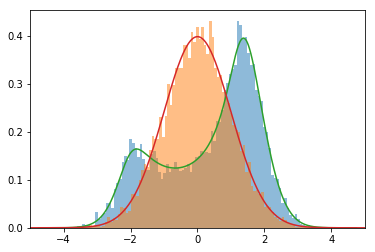

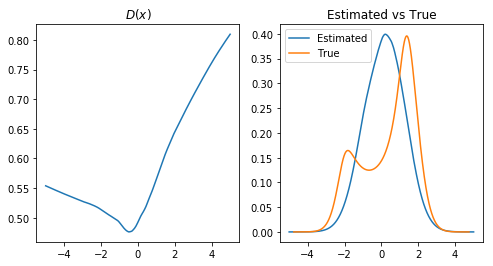

In [0]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 23 13:20:15 2019

@author: chin-weihuang
"""


from __future__ import print_function
import numpy as np
import torch 
import matplotlib.pyplot as plt
import os
import itertools
import pickle
import imageio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import samplers





# plot p0 and p1
plt.figure()

# empirical
xx = torch.randn(10000)
f = lambda x: torch.tanh(x*2+1) + x*0.75
d = lambda x: (1-torch.tanh(x*2+1)**2)*2+0.75
plt.hist(f(xx), 100, alpha=0.5, density=1)
plt.hist(xx, 100, alpha=0.5, density=1)
plt.xlim(-5,5)
# exact
xx = np.linspace(-5,5,1000)
N = lambda x: np.exp(-x**2/2.)/((2*np.pi)**0.5)
plt.plot(f(torch.from_numpy(xx)).numpy(), d(torch.from_numpy(xx)).numpy()**(-1)*N(xx))
plt.plot(xx, N(xx))


############### import the sampler ``samplers.distribution4'' 
############### train a discriminator on distribution4 and standard gaussian
############### estimate the density of distribution4

#######--- INSERT YOUR CODE BELOW ---#######
 





class D(nn.Module):
  def __init__(self, d=[1000,1000],dmz=1):
    super(D, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(dmz, d[0]),
        nn.ReLU(),
        nn.Linear(d[0], d[1]),
        nn.ReLU(),
        nn.Linear(d[1], 1),
        nn.Sigmoid()
    )
      
  def forward(self, x):
    x = self.layers(x)
    return x
  
def D_loss(x,y):
  loss=(torch.log(x)+torch.log(1-y))
  return -loss






def train_D(model, epochs, p, q):
  train_losses = []
  model.train()
  for epoch in range(epochs):
      


      for i in range(1):

          optimizer.zero_grad()

          x=model(Variable(torch.from_numpy(next(p))).float().to(device))
          y=model(Variable(torch.from_numpy(next(q))).float().to(device))
          loss=-(torch.log(x)+torch.log(1-y)).mean()
          loss.backward()
          optimizer.step()

          train_losses.append(loss)
  return  train_losses

r=[]

dmz=1
model=D()
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

epochs = 500
p=samplers.distribution4(512)
q=samplers.distribution3(512)

loss=train_D(model, epochs, p, q)










############### plotting things
############### (1) plot the output of your trained discriminator 
############### (2) plot the estimated density contrasted with the true density



x=torch.reshape(torch.from_numpy(xx).float().to(device),(1000,1))
print(x.shape)
r=model(x).cpu().detach().numpy()



plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(xx,r)
plt.title(r'$D(x)$')

estimate = (r)/(1-r)*np.exp(-np.reshape(xx,(1000,1))**2/2.)/((2*np.pi)**0.5) # estimate the density of distribution4 (on xx) using the discriminator; 
                                
print(estimate.shape)
  
plt.subplot(1,2,2)
plt.plot(xx,estimate)
plt.plot(f(torch.from_numpy(xx)).numpy(), d(torch.from_numpy(xx)).numpy()**(-1)*N(xx))
plt.legend(['Estimated','True'])
plt.title('Estimated vs True')



[tensor(1.4106, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4095, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4086, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4103, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4122, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4079, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4041, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4095, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4056, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4068, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4073, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4049, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4072, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4027, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4052, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4054, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4019, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4016, device='cuda:0', grad_fn=<NegBac

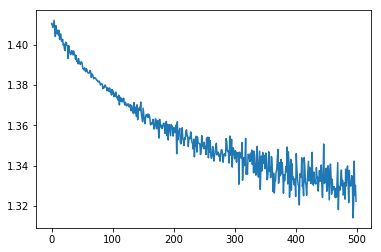

In [0]:
plt.plot(np.arange(epochs),loss)
print(loss)

torch.Size([1000, 1])
(1000, 1)


Text(0.5, 1.0, 'Estimated vs True')

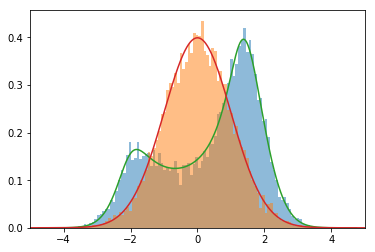

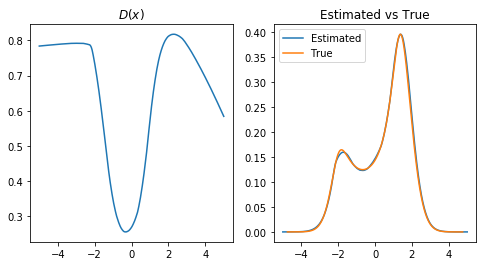

In [5]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 23 13:20:15 2019

@author: chin-weihuang
"""


from __future__ import print_function
import numpy as np
import torch 
import matplotlib.pyplot as plt
import os
import itertools
import pickle
import imageio
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import samplers


# plot p0 and p1
plt.figure()

# empirical
xx = torch.randn(10000)
f = lambda x: torch.tanh(x*2+1) + x*0.75
d = lambda x: (1-torch.tanh(x*2+1)**2)*2+0.75
plt.hist(f(xx), 100, alpha=0.5, density=1)
plt.hist(xx, 100, alpha=0.5, density=1)
plt.xlim(-5,5)
# exact
xx = np.linspace(-5,5,1000)
N = lambda x: np.exp(-x**2/2.)/((2*np.pi)**0.5)
plt.plot(f(torch.from_numpy(xx)).numpy(), d(torch.from_numpy(xx)).numpy()**(-1)*N(xx))
plt.plot(xx, N(xx))


############### import the sampler ``samplers.distribution4'' 
############### train a discriminator on distribution4 and standard gaussian
############### estimate the density of distribution4

#######--- INSERT YOUR CODE BELOW ---#######
 






class D(nn.Module):
  def __init__(self, d=[1000,1000],dmz=1):
    super(D, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(dmz, d[0]),
        nn.ReLU(),
        nn.Linear(d[0], d[1]),
        nn.ReLU(),
        nn.Linear(d[1], 1),
        nn.Sigmoid()
    )
      
  def forward(self, x):
    x = self.layers(x)
    return x
  
def D_loss(x,y):
  loss=(torch.log(x)+torch.log(1-y))
  return -loss






def train_D(model, epochs, p, q):
  train_losses = []
  model.train()
  for epoch in range(epochs):
      


      for i in range(1):

          optimizer.zero_grad()

          x=model(Variable(torch.from_numpy(next(p))).float().to(device))
          y=model(Variable(torch.from_numpy(next(q))).float().to(device))
          loss=-(torch.log(x)+torch.log(1-y)).mean()
          loss.backward()
          optimizer.step()

          train_losses.append(loss)
  return  train_losses


r=[]

dmz=1
model=D()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 100
p=samplers.distribution4(20000)
q=samplers.distribution3(20000)

loss=train_D(model, epochs, p, q)











############### plotting things
############### (1) plot the output of your trained discriminator 
############### (2) plot the estimated density contrasted with the true density



#r = train_D(model, epochs, p, q).cpu().detach().numpy() # evaluate xx using your discriminator; replace xx with the output
x=torch.reshape(torch.from_numpy(xx).float().to(device),(1000,1))
print(x.shape)
r=model(x).cpu().detach().numpy()

#print(r)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(xx,r)
plt.title(r'$D(x)$')

estimate = (r)/(1-r)*np.exp(-np.reshape(xx,(1000,1))**2/2.)/((2*np.pi)**0.5) # estimate the density of distribution4 (on xx) using the discriminator; 
                               
print(estimate.shape)
  
plt.subplot(1,2,2)
plt.plot(xx,estimate)
plt.plot(f(torch.from_numpy(xx)).numpy(), d(torch.from_numpy(xx)).numpy()**(-1)*N(xx))
plt.legend(['Estimated','True'])
plt.title('Estimated vs True')


[tensor(1.4233, device='cuda:0', grad_fn=<NegBackward>), tensor(1.8548, device='cuda:0', grad_fn=<NegBackward>), tensor(1.3031, device='cuda:0', grad_fn=<NegBackward>), tensor(1.3923, device='cuda:0', grad_fn=<NegBackward>), tensor(1.4400, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2847, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2227, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2679, device='cuda:0', grad_fn=<NegBackward>), tensor(1.3163, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2969, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2632, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2217, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2342, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2561, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2542, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2462, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2281, device='cuda:0', grad_fn=<NegBackward>), tensor(1.2285, device='cuda:0', grad_fn=<NegBac

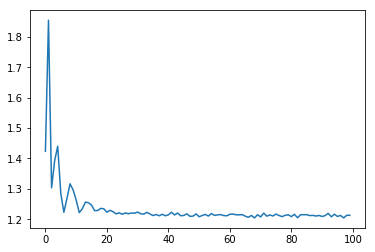

In [6]:
plt.plot(np.arange(epochs),loss)
print(loss)